In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [5]:
#Data collection n preprocessing
car_df = pd.read_csv('/content/car data.csv')

car_df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_df.shape

(301, 9)

In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
car_df.isnull().sum()  # checking number of missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [13]:
 #checking distribution of categorical data
print(car_df.Fuel_Type.value_counts())
print(car_df.Selling_type.value_counts())
print(car_df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [16]:
#encoding the categorical data

car_df.replace({'Fuel_Type' : {'Petrol':0, 'Diesel':1,'CNG':2}}, inplace = True)

car_df.replace({'Selling_type' : {'Dealer':0, 'Individual':1,}}, inplace = True)

car_df.replace({'Transmission' : {'Manual':0, 'Automatic':1,}}, inplace = True)

In [17]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [18]:
#split data into training data and test data

X = car_df.drop(['Car_Name','Selling_Price'],axis = 1)
Y = car_df['Selling_Price']

In [19]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [20]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [21]:
#split training and test data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state = 2)

In [22]:
#Model Training

#1. Linear Regression

#load linear regression model

lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [23]:
#prediction on training data
prediction1 = lin_reg_model.predict(X_train)

In [24]:
# R squared error
error_score = metrics.r2_score(Y_train,prediction1)
print("R Squared Error : ", error_score)

R Squared Error :  0.8796483009370215


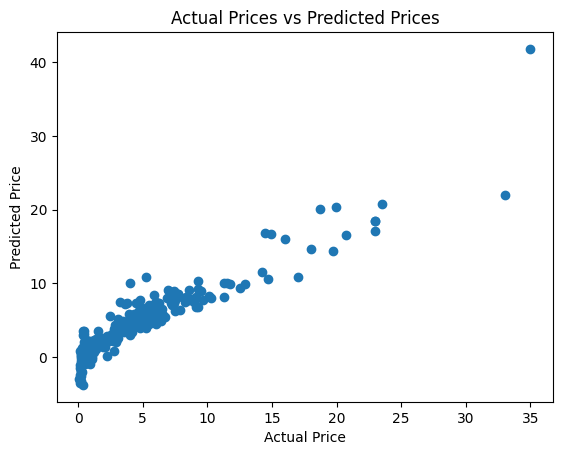

In [25]:
#Visualize actual prices and predicted prices

plt.scatter(Y_train, prediction1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


R Squared Error :  0.8365861023210703


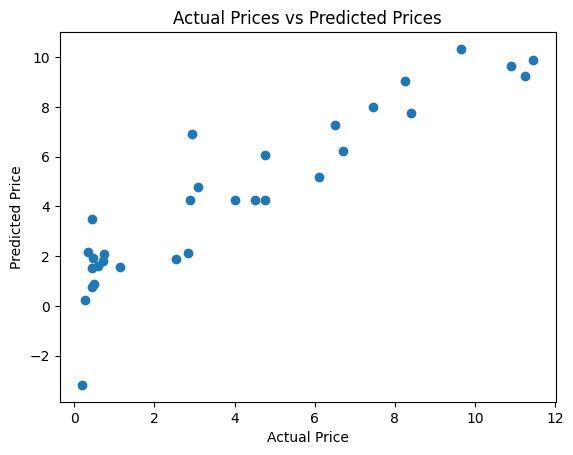

In [29]:
#prediction on testing data
prediction2 = lin_reg_model.predict(X_test)

# R squared error
error_score = metrics.r2_score(Y_test,prediction2)
print("R Squared Error : ", error_score)


#Visualize actual prices and predicted prices

plt.scatter(Y_test, prediction2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


### Model 2-> Lasso Regression

In [30]:
#Model Training

#2. Lasso Regression

#load lasso regression model

lasso_reg_model = Lasso()

lasso_reg_model.fit(X_train,Y_train)

Lasso()

R Squared Error :  0.8424480718240743


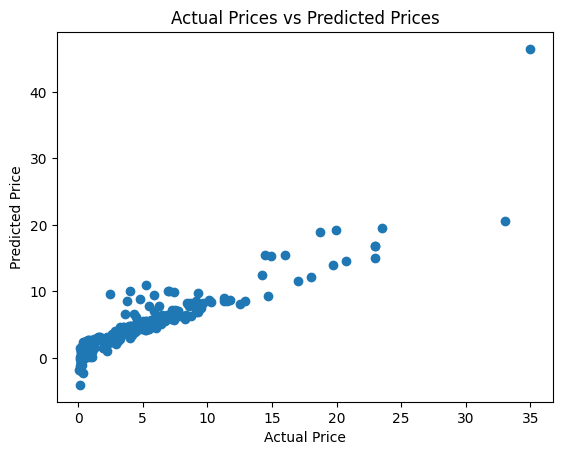

In [31]:
#prediction on training data
prediction1 = lasso_reg_model.predict(X_train)

# R squared error
error_score = metrics.r2_score(Y_train,prediction1)
print("R Squared Error : ", error_score)


#Visualize actual prices and predicted prices

plt.scatter(Y_train, prediction1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


R Squared Error :  0.8709763132343395


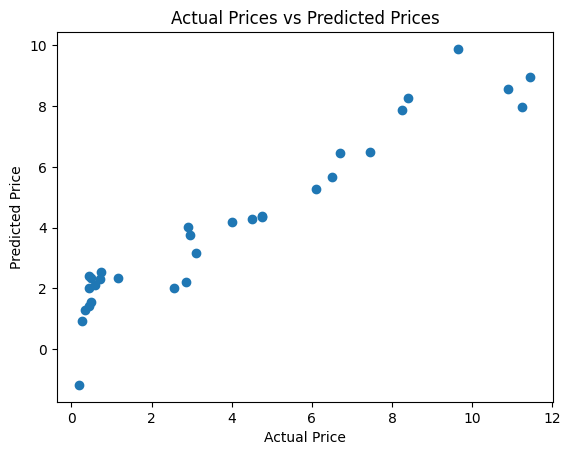

In [32]:
#prediction on testing data
prediction2 = lasso_reg_model.predict(X_test)

# R squared error
error_score = metrics.r2_score(Y_test,prediction2)
print("R Squared Error : ", error_score)


#Visualize actual prices and predicted prices

plt.scatter(Y_test, prediction2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()